## Problem Set for Lecture I: Fourier Analysis (Bryan's Version) 

Bryan Scott, CIERA/Northwestern

DSFP Session 20: Time Series Methods in Astronomy

Adapted and Expanded from Exercises Originally given by L. Bugnet (Flatiron Institute) at Session 13 of the Data Science Fellowship Program 

version 0.1

In this notebook, you will find four problems intended to build intuition about the development of the Fourier Transform from Fourier series. Because Fourier series are expressed in terms of coefficients computed from integral expressions, I have given you some expressions and asked you to compute others. 

This can be done either by hand or with a tool like sympy or Mathematica. Do not spend too much time on the integrals, but if you have not done a Fourier Series by hand before (or haven't in a long time) make sure you are able to work at least one of these out for yourself to see how it works. 

Many of the interesting or important features of Fourier analysis are asked in the form of questions in this notebook. Make sure you take a few minutes to think about them and discuss with your neighbor. The last problem will model applications of Fourier analysis on real data from the $\textit{Kepler}$ mission. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Problem 1: Fourier Series for discontinuous functions 

## Problem 1: Use the formula defining the Fourier Series to write down a series approximation to the square wave defined by:

$$
f(t) \begin{cases} 
      +1 & 0 \leq x\leq \pi \\
      0 & \pi \leq x\leq 2\pi \\
   \end{cases}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

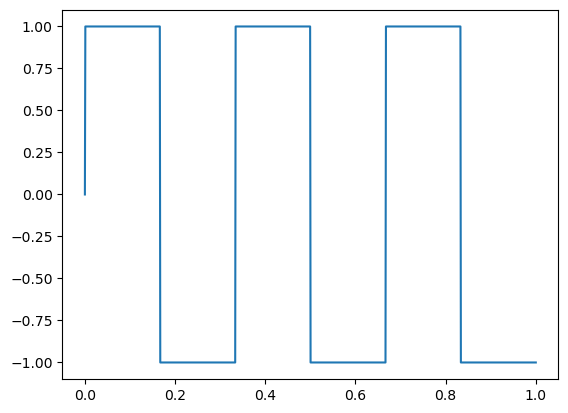

In [3]:
# Plot f over 3T-wide intervals:
# you can use this template or np.piecewise/lambda function here for a slightly fancier solution

# x1=
# x2=

# plt.figure()
# for ii in range(0,4):
#     plt.plot()
#     plt.plot()

t = np.linspace(0, 1, 1000)
f = 1.0 * np.sign(np.sin(2 * np.pi * 1.0 * 3*t))

# Plot the square wave.
plt.plot(t, f)

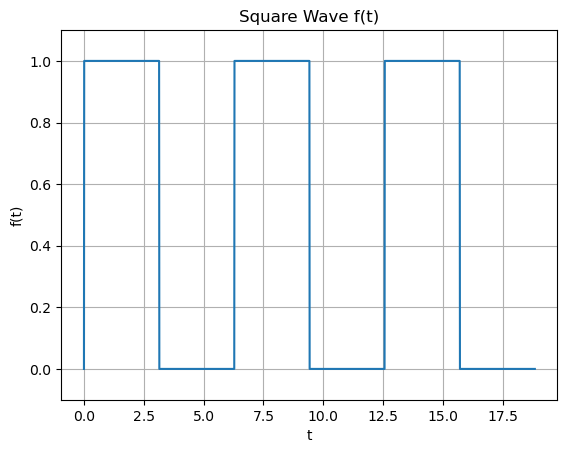

In [4]:
def square_wave(x):
    period = 2 * np.pi  # Period of the square wave
    if 0 < x % period < np.pi:
        return 1
    else:
        return 0

# Generate x values from 0 to 3 * period with a step of 0.01
x_values = np.arange(0, 3 * 2 * np.pi, 0.01)

# Calculate the corresponding y values for the square wave
y_values = [square_wave(x) for x in x_values]

# Plotting
plt.plot(x_values, y_values)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Square Wave f(t)')
plt.ylim(-0.1, 1.1)  # Set y-axis limits to include 0 and 1
plt.grid(True)
plt.show()

### Part A) Show that the Fourier Series expansion for this function is given by:

$$
F(t) = 1/2 + \Sigma_{n=1}^{\infty} \left( \frac{sin n\pi}{n \pi} cos(n t) + \frac{1 - cos(n\pi)}{n \pi} sin(n t) \right)
$$

by computing the integrals for $a_n$, $b_n$, and $a_0$.

### Part B) Now write a function to plot the Fourier Series expressions for different numbers of sine and cosine functions.  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


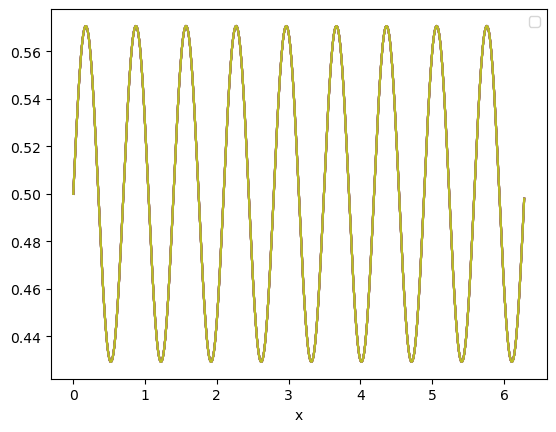

In [5]:
#Overplot Fourier Serie F:
t = np.arange(0, 2 * np.pi, 0.01)
a0 = 1./2.
Na = 10  #number of trig functions to consider in the Fourier Serie

#Fucntion that calculates F from a0, an, bn:
def f_N(t, N, a0):
    
    for n in range(1, Na):
        an = (np.sin(n*np.pi) * np.cos(n*t))/(n*np.pi)
        bn = ((1 - np.cos(n*np.pi))*np.sin(n*t))/(n*np.pi)
        f_N = an + bn
    return a0 + f_N
    
    
for N in range(1, Na):
    plt.plot(t, f_N(t=t, N=N, a0=a0))
plt.xlabel('x')
plt.legend(loc='best')

## Part 2: Repeat the above for the triangle wave that I showed in my lecture and replicate my plots

You will need the fact that the Fourier series for the triangle wave is

$$
\tilde{f}(x) = \frac{2}{\pi(2n -1))^2} cos( 2 \pi (2n -1)x)
$$

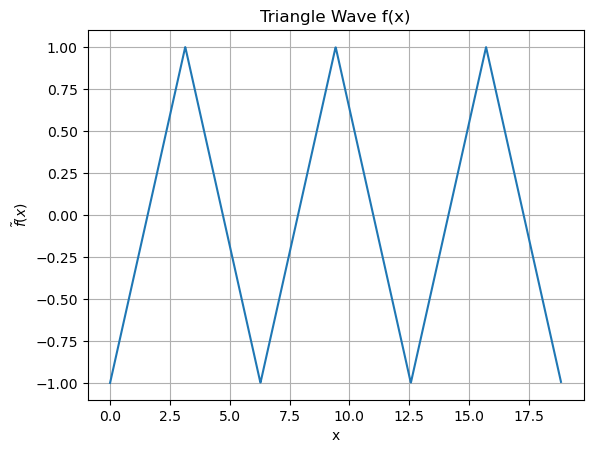

In [6]:
# plot the triangle wave function here

def triangle_wave(x):
    period = 2 * np.pi  # Period of the triangle wave
    phase = x % period
    if phase < np.pi:
        return (2 / np.pi) * phase - 1
    else:
        return (-2 / np.pi) * phase + 3

# Generate x values from 0 to 3 * period with a step of 0.01
x_values = np.arange(0, 3 * 2 * np.pi, 0.01)

# Calculate the corresponding y values for the triangle wave
y_values = [triangle_wave(x) for x in x_values]

# Plotting
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel(r'$\tilde{f}(x)$')
plt.title('Triangle Wave f(x)')
plt.ylim(-1.1, 1.1)  # Set y-axis limits to include -1 and 1
plt.grid(True)
plt.show()

$$
\tilde{f}(x) = \frac{2}{\pi(2n -1))^2} cos( 2 \pi (2n -1)x)
$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


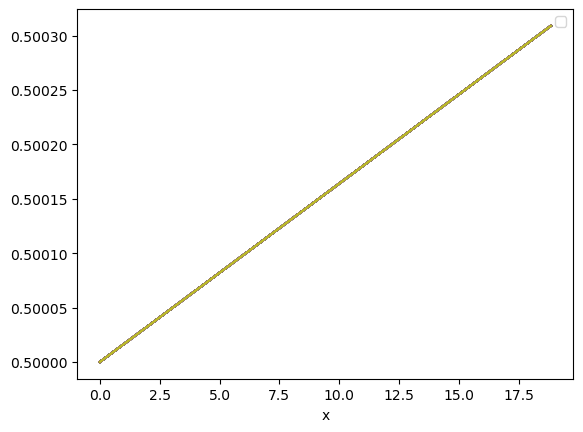

In [7]:
#Overplot Fourier Serie F:
x = np.arange(0, 6*np.pi, 0.01)
a0 = 1./2.
Na = 100  #number of trig functions to consider in the Fourier Serie

#Fucntion that calculates F from a0, an, bn:
def f_N(t, N, a0):
    
    for n in range(1, N):
        f_N = (2 * np.cos(2 * np.pi * (2*n - 1)) * x) / (np.pi * (2*n - 1)**2)
    return a0 + f_N
    
    
for N in range(1, Na):
    plt.plot(x, f_N(t=x, N=Na, a0=a0))
plt.xlabel('x')
plt.legend(loc='best')

## Part 3: What do you notice about the behavior of the approximations you just derived? Why do you think this happens?

Hint: Take the derivatives of the two functions. What differs between them? We'll come back to this in the afternoon session. 

# Problem 2: Fourier Transforms of Periodic and Non-periodic Functions

Plot the periodic function

$$
f(x) = \sin(6\pi x)
$$

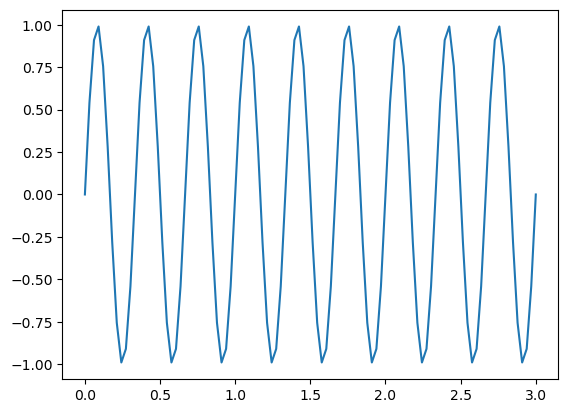

In [8]:
x = np.linspace(0,3,100)
y = np.sin(6*np.pi*x)
plt.plot(x,y)

## Part 1: Visualizing the Fourier Transforms of a Periodic and Non-periodic Function 

Now construct a counterpart function that decays exponentially. Introducing an exponential decay is a common way of making a non-periodic function periodic. We will study this during the afternoon lecture, but can you see why this works from the definition of the Fourier transform? Why this works physically? And why might it mean that damped physical systems have EOM that can be solved by Fourier transform methods?

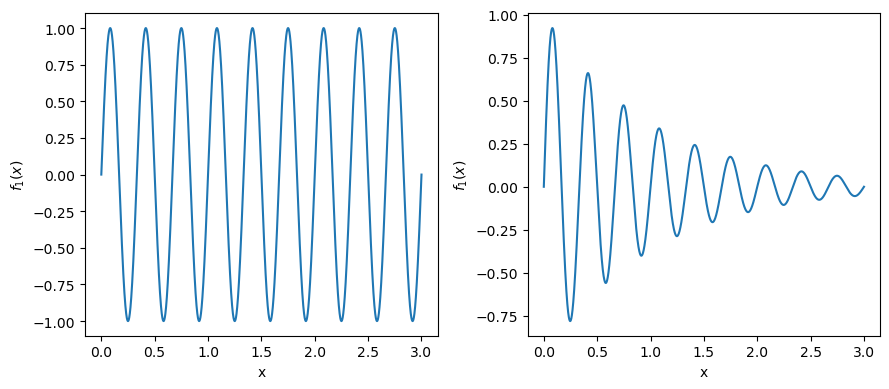

In [9]:
x = np.linspace(0,3, 10000)
fig, ax = plt.subplots(1,2, figsize=(9,4))
f1 = np.sin(6*np.pi*x)
f1_damp = np.exp(-x) * f1

#plot function f1:
ax[0].plot(x, f1)

ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$f_1(x)$')

#plot function f2:
ax[1].plot(x, f1_damp)

ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$f_1(x)$')

plt.tight_layout();

Now plot the fourier transforms of each function. The analytic fourier transform for my choice of exponential decay is:

$$
\frac{6\pi}{(2\pi+2\pi i \nu)^2+(6 \pi)^2}
$$.

How do you deal with the imaginary term in this equation? What will the Fourier transform of the periodic function be? After plotting the fourier transforms of both functions, discuss what you notice. What does this tell you about the Fourier transforms of periodic and non-periodic functions, respectively? 

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


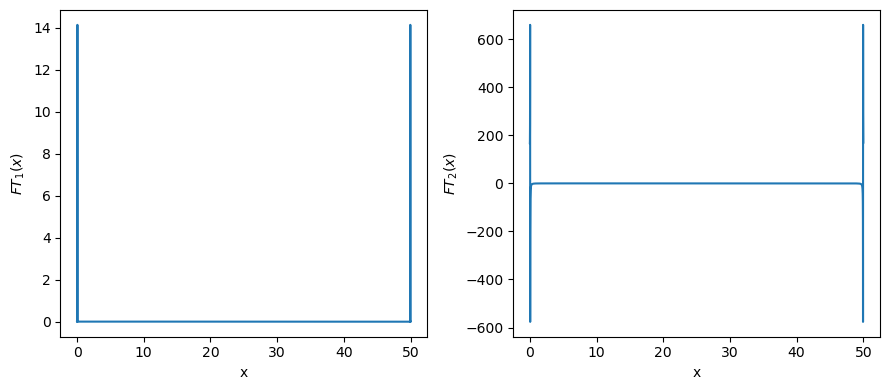

In [10]:
nu = np.linspace(0,50, 10000)

#we approximate FT1 with:
# FT1 = np.zeros(10000)
# FT1[]=

# #plot FT1:
# plt.plot(nu, )


# #plot FT2
# FT2 = 
# plt.plot(, color='crimson')

FT1 = np.zeros(10000)

FT1 = np.fft.fft(f1)
FT2 = np.fft.fft(f1_damp)

fig, ax = plt.subplots(1,2, figsize=(9,4))
#plot function f1:
ax[0].plot(nu, FT1)

ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$FT_1(x)$')

#plot function f2:
ax[1].plot(nu, FT2)

ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$FT_2(x)$')

plt.tight_layout();

## Part 2: Recreate My Fourier Transform as the Limiting Function Figure 

In the lecture portion, I showed a figure where I increased the number of c_n terms plotted and derived a "bounding" function for the Fourier Series of the RECT function. Recreate this figure by writing down an expression for the Fourier coefficients and then plotting them for different values of n. 

In [11]:
def c_n(n, T):
    if n == 0:
        return 1./2.
    else:
        return 
    
c_n_list = []
nlist = 
for i in nlist:
    c_n_list.append()
    

SyntaxError: invalid syntax (628152376.py, line 8)

In [ ]:
for i,c_n in enumerate(c_n_list):
    plt.vlines()
    
plt.plot()

### Now repeat this exercise by taking the fft of a piecewise defined rect function. 

Hint: You may find it helpful to make use of the np.fft.fft and np.fft.fftfreq helper function, as well as using np.piecewise with lambda function syntax. See the example in the np.piecewise documentation: https://numpy.org/doc/stable/reference/generated/numpy.piecewise.html 

In [ ]:
x = np.linspace(-1.5, 1.5, )

t = np.piecewise()

freq = 
sp = 
plt.plot()

# Problem 3:  Power Spectral Densities 

The power spectral density is defined as:

$$
PSD(\nu) = \lim_{T \rightarrow \infty} \frac{1}{T} \|{\tilde{f}(\nu)}\|^2
$$

In this problem, you will investigate the origin of the 1/T term and the utility of computing this quantity as opposed to simply computing the Fourier transform itself. Luckily for us, the above term can be computed using the scipy.welch function. 

Begin by plotting a 1D periodic signal (I've provided some reproducible parameter choices for you), then compute the FFT and PSD as you increase the number of points in time that you 'sample the signal at'. We will discuss what sampling means more formally in the afternoon.  

In [ ]:
from scipy.signal import welch

In [ ]:

fs = 10e3
N = 1e3
amp = 2*np.sqrt(2)
freq = 1234.0
time = np.arange(N) / fs
x = 
f, Pxx_den = welch()

fig, ax = plt.subplots(2,3, figsize=(9,6))

ax[0,0].plot()

# fill in the appropriate plots 


ax[0,1].set_xlabel('frequency [Hz]')
ax[0,1].set_ylabel('PSD')
ax[0,1].set_xlabel('frequency [Hz]')
ax[0,2].set_ylabel('FFT')


# now repeat the exercise with a higher sampling rate N, 
# what do you notice about the behavior of the PSD and FFT respectively?


# Problem 4: Application to Real Data 

In [12]:
# pip install lightkurve 
from lightkurve import search_targetpixelfile
import lightkurve as lk

### Part a) Load a Kepler Lightcurve 

The lightkurve package contains a number of convenience methods for loading and working with light curve data. 

In [13]:
#Download KIC 3541346 lightcurve (flux VS time):
search_result = lk.search_lightcurve('KIC 3541346', author='Kepler', cadence='long')
print(search_result)

SearchResult containing 17 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 01 2009 Kepler    1800 kplr003541346      0.0
  1 Kepler Quarter 02 2009 Kepler    1800 kplr003541346      0.0
  2 Kepler Quarter 03 2009 Kepler    1800 kplr003541346      0.0
  3 Kepler Quarter 04 2010 Kepler    1800 kplr003541346      0.0
  4 Kepler Quarter 05 2010 Kepler    1800 kplr003541346      0.0
  5 Kepler Quarter 06 2010 Kepler    1800 kplr003541346      0.0
  6 Kepler Quarter 07 2010 Kepler    1800 kplr003541346      0.0
  7 Kepler Quarter 10 2011 Kepler    1800 kplr003541346      0.0
  8 Kepler Quarter 09 2011 Kepler    1800 kplr003541346      0.0
  9 Kepler Quarter 08 2011 Kepler    1800 kplr003541346      0.0
 10 Kepler Quarter 11 2012 Kepler    1800 kplr003541346      0.0
 11 Kepler Quarter 12 2012 Kepler    1800 kplr0

In [14]:
lc_collection = search_result.download_all()
#we stitch all the quarters together:
lc_stitched = lc_collection.stitch()
lc_stitched.plot();

TypeError: 'MaskedQuantity' object with a scalar value is not iterable

### Part b) How to handle gaps in time series

The results we saw in the lecture all depend on even sampling of the time series and we will see more formally well posed methods for dealing with gaps in data in tomorrow's lectures. For now, we need to (evenly) fill in the gaps in the light curve that we downloaded so that we can apply our Fourier analysis tools. 

In [ ]:
# Let's start by seeing where the largest gaps are
time = lc_stitched.time.to_value(format='jd')
flux = lc_stitched.flux.to_value()

plt.figure()
plt.plot(np.diff(time), color='dodgerblue')

print(np.median(np.diff(time)))

It looks like time differences > 0.02 should be considered gaps. We also need to resample the time series onto an *evenly* spaced grid. Two options: 

1) just resample to the nearest point and append zero 
2) generate an interpolating function and resample onto an even time grid

Give both a try and compare the resulting time series

In [ ]:
plt.figure()
plt.plot(new_time, new_flux, color='dodgerblue')
plt.plot(time, flux, color = 'orange')
plt.xlabel('Time [days]')
plt.ylabel('Flux')

### Part c) Compute the FFT and estimate the period. As we saw before, the FFT depends on the number of sample points and the bandwidth. We'll understand the theory of this better in the afternoon, but compute the FFT for different time windows and compare the results. What happens?

In [ ]:
# ---Fill and excecute this cell---
time_res=(new_time[1]-new_time[0])#/len(time)
# Number of sample points
N = len(new_flux)

print(N)
# sample spacing
T = time_res

yf = np.fft.fft(new_flux)
xf = np.fft.fftfreq(N, T)[1:N//2]

print(xf)
print(yf)

fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].set_yscale('log')
ax[0].plot(xf, np.abs(yf[1:N//2]), color='dodgerblue')

wh = np.argwhere((np.abs(yf[10:N//2])==np.max(np.abs(yf[10:N//2]))) )
frequency_max = xf[9:][wh]

print(frequency_max)

Period = 1/frequency_max[0][0]
ax[0].plot(frequency_max[0][0],np.abs(yf[10:N//2])[wh], '+', color='dodgerblue', markersize=5 )
ax[0].set_xlabel(r'Frequency [day$^{-1}$]')
ax[0].set_ylabel(r'FFT Amplitude')

print('Period from FFT1 = '+str(Period)+' days')

#compare with shorter time serie:
time2 = time[:130]
flux2 = flux[:130]
# Number of sample points
N = len(flux2)
# sample spacing
T = time_res

yf = np.fft.fft(flux2)
xf = np.fft.fftfreq(N, T)[1:N//2]

ax[1].set_yscale('log')
ax[1].plot(xf, np.abs(yf[1:N//2]), color='dodgerblue')

wh = np.argwhere((np.abs(yf[1:N//2])==np.max(np.abs(yf[1:N//2]))) )
frequency_max2 = xf[:][wh]
Period2 = 1/frequency_max2[0][0]
ax[1].plot(frequency_max2[0][0],np.abs(yf[1:N//2])[wh], '+', color='dodgerblue', markersize=5 )
ax[1].set_xlabel(r'Frequency [day$^{-1}$]')
ax[1].set_ylabel(r'FFT Amplitude')

print('Period from FFT2 = '+str(Period2)+' days')

In [ ]:
newest_flux[np.where(np.isnan(newest_flux))] = 0

In [ ]:
np.sum(np.isnan(new_flux))